<a href="https://colab.research.google.com/github/yasminbottan/regressao/blob/main/Projeto_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STUDENT PERFORMANCE DATASET**

## **Resumo:**
O Student Performance Dataset é um conjunto de dados projetado para examinar os fatores que influenciam o desempenho acadêmico dos alunos. O conjunto de dados consiste em 10.000 registros de alunos, com cada registro contendo informações sobre vários preditores e um índice de desempenho.

## **Variáveis:**
* Horas estudadas: o número total de horas gastas estudando por cada aluno.
* Pontuações anteriores: as pontuações obtidas pelos alunos em testes anteriores.
* Atividades extracurriculares: se o aluno participa de atividades extracurriculares (sim ou não).
* Horas de sono: o número médio de horas de sono que o aluno teve por dia.
* Testes de perguntas praticados: o número de testes de perguntas que o aluno praticou.

## **Target:**
* Índice de desempenho: uma medida do desempenho geral de cada aluno. O índice de desempenho representa o desempenho acadêmico do aluno e foi arredondado para o inteiro mais próximo. O índice varia de 10 a 100, com valores mais altos indicando melhor desempenho.

## **Fonte:**
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

# **BIBLIOTECAS, FONTES E BASE DE DADOS**

In [ ]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from tabulate import tabulate

# regressão linear
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# métricas de avaliação
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, max_error, mean_squared_log_error

In [ ]:
# Carregar base de dados
df = pd.read_csv('Student_Performance.csv', encoding='latin1', delimiter=',')

# **PREPARAÇÃO DA BASE**


In [ ]:
# Verificação das informações da tabela
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

<ipython-input-4-dffae8795ae7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [ ]:
# Verificando formato da base criada
df.shape

(10000, 6)

In [ ]:
# dtype de cada coluna
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,int64
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [ ]:
# verifica missing values
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


**Conclusão:** Não há valores nulos

In [ ]:
# verifica linhas duplicadas
df.duplicated().sum()

127

**Conclusão:** Há 127 linhas duplicadas que devem ser excluidas

In [ ]:
# Excluir linhas duplicadas
df = df.drop_duplicates()

# verifica linhas duplicadas
df.duplicated().sum()

0

**Conclusão:** Linhas duplicadas foram excluidas

In [ ]:
# Criar 3 bases de estudo:

df_total = df
df_atvd_curric = df[df['Extracurricular Activities'] == 1]
df_natvd_curric = df[df['Extracurricular Activities'] == 0]


1) Todos os dados

2) Apenas alunos que realizaram atividades Extracurriculares

3) Apenas alunos que não realizaram atividades Extracurriculares

In [ ]:
# sumário estatístico df_total
df_total.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


**Conclusão:** Não foi identificado nenhum valor fora da normalidade

In [ ]:
# sumário estatístico df_atvd_curric
df_atvd_curric.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,4887.000000,4887.000000,4887.0,4887.000000,4887.000000,4887.000000
mean,5.004911,69.607939,1.0,6.490485,4.623082,55.722529
std,2.574390,17.336965,0.0,1.690509,2.853057,19.260073
min,1.000000,40.000000,1.0,4.000000,0.000000,11.000000
25%,3.000000,55.000000,1.0,5.000000,2.000000,41.000000
50%,5.000000,70.000000,1.0,6.000000,5.000000,55.000000
75%,7.000000,85.000000,1.0,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.0,9.000000,9.000000,100.000000


**Conclusão:** Não foi identificado nenhum valor fora da normalidade

In [ ]:
# sumário estatístico df_natvd_curric
df_natvd_curric.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,4986.000000,4986.000000,4986.0,4986.000000,4986.000000,4986.000000
mean,4.979543,69.277577,0.0,6.572002,4.543722,54.720818
std,2.603597,17.314634,0.0,1.703890,2.880745,19.146919
min,1.000000,40.000000,0.0,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.0,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.0,7.000000,5.000000,55.000000
75%,7.000000,84.000000,0.0,8.000000,7.000000,70.000000
max,9.000000,99.000000,0.0,9.000000,9.000000,99.000000


**Conclusão:** Não foi identificado nenhum valor fora da normalidade

In [ ]:
# selecionando o target df_total
target = 'Performance Index'

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df_total.columns if col not in [target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X = df_total.filter(num_vars).copy()
y = df_total['Performance Index'].copy()

# selecionando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [ ]:
# selecionando o target df_atvd_curric
target = 'Performance Index'

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df_atvd_curric.columns if col not in [target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X_atvd = df_atvd_curric.filter(num_vars).copy()
y_atvd = df_atvd_curric['Performance Index'].copy()

# selecionando treino e teste
X_train_atvd, X_test_atvd, y_train_atvd, y_test_atvd = train_test_split(X_atvd, y_atvd, train_size=0.8, random_state=30)

In [ ]:
# selecionando o target df_natvd_curric
target = 'Performance Index'

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df_natvd_curric.columns if col not in [target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X_natvd = df_natvd_curric.filter(num_vars).copy()
y_natvd = df_natvd_curric['Performance Index'].copy()

# selecionando treino e teste
X_train_natvd, X_test_natvd, y_train_natvd, y_test_natvd = train_test_split(X_natvd, y_natvd, train_size=0.8, random_state=30)

## **APLICANDO REGRESSÃO LINEAR MÚLTIPLA**


In [ ]:
# instalando o pacote feature-engine
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
# definição um pipeline de pré-processamento e modelagem da regessão linear

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_vars)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LinearRegression())
])

In [ ]:
# Treinamento do modelo geral

model.fit(X_train, y_train)
y_previsto = model.predict(X_test)
y_esperado = y_test.copy()

In [ ]:
# Treinamento do modelo com atividades extracurriculares

model.fit(X_train_atvd, y_train_atvd)
y_previsto_atvd = model.predict(X_test_atvd)
y_esperado_atvd = y_test_atvd.copy()

In [ ]:
# Treinamento do modelo sem atividades extracurriculares

model.fit(X_train_natvd, y_train_natvd)
y_previsto_natvd = model.predict(X_test_natvd)
y_esperado_natvd = y_test_natvd.copy()

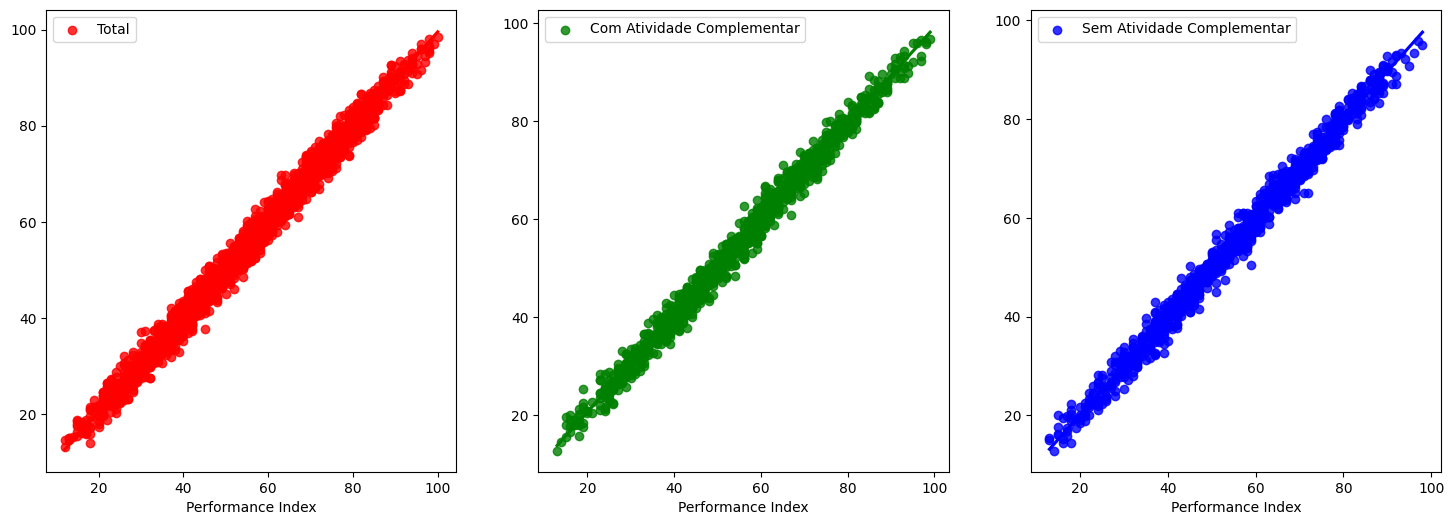

In [ ]:
# Gráfico para anlisar a dispersão dos dados

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.regplot(x=y_esperado, y=y_previsto, label='Total', ax=ax[0], color='red');
sns.regplot(x=y_esperado_atvd, y=y_previsto_atvd, label='Com Atividade Complementar', ax=ax[1], color='green');
sns.regplot(x=y_esperado_natvd, y=y_previsto_natvd, label='Sem Atividade Complementar', ax=ax[2], color='blue');
ax[0].legend();
ax[1].legend();
ax[2].legend();

**Conclusão:** Não há valores muito dispersos da média.

## **MÉTRICAS DE AVALIAÇÃO**

As métricas de avaliação podem ser afetadas pelos outliers causando desproporcionalidade. Portanto, vamos avaliar os dados com boxplots para identificar pontos discrepantes e, se necesssário, realizarmos o tratamento adequado para cada situação.

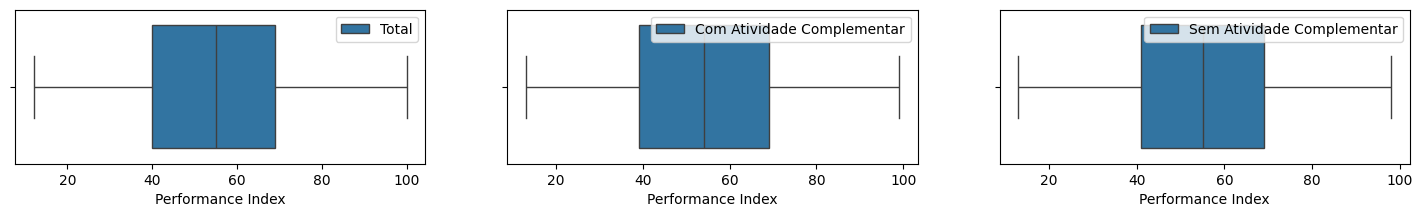

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,2))

sns.boxplot(x=y_esperado, label='Total', ax=ax[0]);
sns.boxplot(x=y_esperado_atvd, label='Com Atividade Complementar', ax=ax[1]);
sns.boxplot(x=y_esperado_natvd, label='Sem Atividade Complementar', ax=ax[2]);

**Conclusão:** Não há outiliers a serem tratados

### R2 e R2 Ajustado

O **Coeficiente de Determinação (R2)** mede a quanto da variável dependente que estamos tentando prever é explicada pelas variáveis independentes que estamos usando no modelo.

Quanto mais próximo de 1 (um), maior a explicabilidade do modelo.

Se R2 for igual a 0 (zero), significa que o modelo não explica nada.


* **CUIDADO:** Quando adicionado uma nova variável ao modelo, o R2 pode indicar uma falsa impressão de melhora no modelo.

In [ ]:
r2_total = r2_score(y_esperado, y_previsto)
r2_atvd = r2_score(y_esperado_atvd, y_previsto_atvd)
r2_natvd = r2_score(y_esperado_natvd, y_previsto_natvd)

print('R2 Total:', '{:.2f}%'.format(r2_total * 100))
print('R2 com Atividade Complementar:', '{:.2f}%'.format(r2_atvd * 100))
print('R2 sem Atividade Complementar:', '{:.2f}%'.format(r2_natvd * 100))

R2 Total: 98.82%
R2 com Atividade Complementar: 98.91%
R2 sem Atividade Complementar: 98.85%


O Coeficiente de Determinação Ajustado (R2 Ajustado) também mede a quanto da variável dependente que estamos tentando prever é explicada pelas variáveis independentes que estamos usando no modelo. Porém, quando adicionado uma npva variável, ele é capaz de avaliar se ela realmente melhora o modelo.

Quanto mais próximo de 1 (um), maior a explicabilidade do modelo.

Se R2 for igual a 0 (zero), significa que o modelo não explica nada.

In [ ]:
# Criação de função para cálculo do R2 ajustado

def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

In [ ]:
r2_ajustado = adjusted_r2(y_esperado, y_previsto, X_train)
r2_ajustado_com_atvd_compl = adjusted_r2(y_esperado_atvd, y_previsto_atvd, X_train_atvd)
r2_ajustado_sem_atvd_compl = adjusted_r2(y_esperado_natvd, y_previsto_natvd, X_train_natvd)


print('R2 Ajustado Total:', '{:.2f}%'.format(r2_ajustado * 100))
print('R2 Ajustado com Atividade Complementar:', '{:.2f}%'.format(r2_ajustado_com_atvd_compl * 100))
print('R2 Ajustado sem Atividade Complementar:', '{:.2f}%'.format(r2_ajustado_sem_atvd_compl * 100))

R2 Ajustado Total: 98.82%
R2 Ajustado com Atividade Complementar: 98.90%
R2 Ajustado sem Atividade Complementar: 98.84%


**Resultado:**

A explicabilidade do modelo está excelente, gira em torno de 99%.

# MAE

O **Mean Absolute Error** (ou, Erro Absoluto Médio) mede o quanto as previsões do modelo, em média, estão se afastando dos valores reais.

Quanto menor for o MAE, melhor o modelo estará performando.
Isso significa que os erros médios são pequenos.

* **CUIDADO:** Essa métrica não é tão sensível a grandes erros. Isso pode ser uma vantagem ou uma limitação dependendo do caso.

In [ ]:
mae = mean_absolute_error(y_esperado, y_previsto)
mae_com_atvd_compl = mean_absolute_error(y_esperado_atvd, y_previsto_atvd)
mae_sem_atvd_compl = mean_absolute_error(y_esperado_natvd, y_previsto_natvd)

print('MAE Total:', '{:.4f}'.format(mae))
print('MAE com Atividade Complementar:', '{:.4f}'.format(mae_com_atvd_compl))
print('MAE sem Atividade Complementar:', '{:.4f}'.format(mae_sem_atvd_compl))

MAE Total: 1.6217
MAE com Atividade Complementar: 1.5899
MAE sem Atividade Complementar: 1.5929


**Resultado:**

O modelo erra em média 1.6 na previsão do índice de desempenhos dos alunos.

# MSE

O **Mean Square Error** (ou, Erro Quadrático Médio) mede o quanto as previsões do modelo, em média quadrática, estão se afastando dos valores reais.
Nessa métrica os erros maiores tem maior peso devido a elevação quadrática.

Quanto menor for o MSE, melhor o modelo estará performando.

Essa métrica é muito útil porque a derivada do quadrado é contínua.

In [ ]:
mse = mean_squared_error(y_esperado, y_previsto)
mse_com_atvd_compl = mean_squared_error(y_esperado_atvd, y_previsto_atvd)
mse_sem_atvd_compl = mean_squared_error(y_esperado_natvd, y_previsto_natvd)

print('MSE Total:', '{:.4f}'.format(mse))
print('MSE com Atividade Complementar::', '{:.4f}'.format(mse_com_atvd_compl))
print('MSE sem Atividade Complementar::', '{:.4f}'.format(mse_sem_atvd_compl))

MSE Total: 4.1534
MSE com Atividade Complementar:: 4.0232
MSE sem Atividade Complementar:: 4.0312


**Resultado:**

Em média, o quadrado do erro do modelo está em torno de 4 pontos na previsão do índice de desempenhos dos alunos.

# RMSE

O **Root Mean Square Error** (ou, Raiz do Erro Quadrático Médio) mede o quanto as previsões do modelo, em raiz quadrática, estão se afastando dos valores reais.

A diferença entre MSE e RMSE é que a última métrica é mais fácil de interpretar já que retorna à unidade original da variável.

Quanto menor for o RMSE, melhor o modelo estará performando.

In [ ]:
# Cálculo utilizando a raiz quadrada do MSE já definido anteriormente

rmse = np.sqrt(mse)
rmse_com_atvd_compl = np.sqrt(mse_com_atvd_compl)
rmse_sem_atvd_compl = np.sqrt(mse_sem_atvd_compl)

print('RMSE Total:', '{:.4f}'.format(rmse))
print('RMSE com Atividade Complementar:', '{:.4f}'.format(rmse_com_atvd_compl))
print('RMSE sem Atividade Complementar:', '{:.4f}'.format(rmse_sem_atvd_compl))

RMSE Total: 2.0380
RMSE com Atividade Complementar: 2.0058
RMSE sem Atividade Complementar: 2.0078


**Resultado:**

Em média, o modelo erra em torno de 2 pontos na previsão do índice de desempenhos dos alunos.

# RMSLE

O **Root Mean Square Logarithmic Error** (ou, Raiz do Erro Quadrático Médio Logarítimo) mede o quanto as previsões do modelo, em raiz quadrática logarítimica, estão se afastando dos valores reais.

Essa métrica é especialmente útil quando você quer comparar as proporções ou taxa de crescimento entre valores reais e valores previstos.

Quanto menor for o RMSLE, melhor o modelo estará performando.

* **CUIDADO:** Não é uma boa opção quando existem dados com valores negativos já que os logatirimos só são definidos por valores positivos

In [ ]:
# Criar função para cálculo do RMSLE

def calcular_rmsle(y_true, y_pred):
    """
    Calcula o RMSLE (Root Mean Squared Logarithmic Error) manualmente.
    """
    # Adicionar 1 aos valores para evitar problemas com log(0)
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)

    # Calcular o erro logarítmico quadrado
    log_error_squared = (log_pred - log_true) ** 2

    # Calcular a média do erro
    mean_log_error = np.mean(log_error_squared)

    # Retornar a raiz quadrada da média
    return np.sqrt(mean_log_error)

In [ ]:
rmsle = calcular_rmsle(y_esperado, y_previsto)
rmsle_com_atvd_compl = calcular_rmsle(y_esperado_atvd, y_previsto_atvd)
rmsle_sem_atvd_compl = calcular_rmsle(y_esperado_natvd, y_previsto_natvd)

print('RMSLE Total:', '{:.4f}'.format(rmsle))
print('RMSLE com Atividade Complementar:', '{:.4f}'.format(rmsle_com_atvd_compl))
print('RMSLE sem Atividade Complementar:', '{:.4f}'.format(rmsle_sem_atvd_compl))

RMSLE Total: 0.0463
RMSLE com Atividade Complementar: 0.0457
RMSLE sem Atividade Complementar: 0.0460


**Resultado:**

Em média logarítima, o modelo erra em torno de 0,5 pontos na previsão do índice de desempenhos dos alunos.

# Max Error

O **Max Error** (ou, Erro Máximo) indica o maior erro absoluto entre os valores reais e valores previstos.

Se o valor for muito alto, pode indicar que o modelo teve dificuldade com alguns casos específicos (possíveis outliers)

* **CUIDADO:** Não reflete o desempenho geral do modelo, ele mostra apenas o pior caso!

In [ ]:
maximo_error = max_error(y_esperado, y_previsto)
maximo_error_com_atvd_compl = max_error(y_esperado_atvd, y_previsto_atvd)
maximo_error_sem_atvd_compl = max_error(y_esperado_natvd, y_previsto_natvd)

print('Max Error Total:', '{:.2f}'.format(maximo_error))
print('Max Error com Atividade Complementar:', '{:.2f}'.format(maximo_error_com_atvd_compl))
print('Max Error sem Atividade Complementar:', '{:.2f}'.format(maximo_error_sem_atvd_compl))

Max Error Total: 7.24
Max Error com Atividade Complementar: 6.59
Max Error sem Atividade Complementar: 8.47


**Resultado:**

O erro máximo do modelo varia de 6 a 9 pontos na previsão do índice de desempenhos dos alunos.

# MedAE

O **Median Absolute Error** (ou, Erro Absoluto Mediano) calcula a mediana dos erros absolutos entre valores reais e valores previstos.

Essa métrica utiliza a mediana não gerando nenhuma interferência caso apareça algum outlier.

Metade das previsões tem um erro absoluto menor ou igual ao MedAE, e a outra metade terá o erro absoluto maior ou igual ao MedAE.

In [ ]:
medae = median_absolute_error(y_esperado, y_previsto)
medae_com_atvd_compl = median_absolute_error(y_esperado_atvd, y_previsto_atvd)
medae_sem_atvd_compl = median_absolute_error(y_esperado_natvd, y_previsto_natvd)

print('MedAE Total:', '{:.2f}'.format(medae))
print('MedAE com Atividade Complementar:', '{:.2f}'.format(medae_com_atvd_compl))
print('MedAE sem Atividade Complementar:', '{:.2f}'.format(medae_sem_atvd_compl))

MedAE Total: 1.35
MedAE com Atividade Complementar: 1.31
MedAE sem Atividade Complementar: 1.35


**Resultado:**

O erro absoluto mediano entre os valores reais e previsto é de 1 ponto na previsão do índice de desempenhos dos alunos.

# MAPE

O **Mean Absolute Percentage Error** (ou, Erro Percentual Absoluto Médio) calcula a média dos erros percentuais absolutos entre os valores reais e valores previstos.

O resultado indica quantos porcentos o modelo errou nas suas previsões. Pode ser usado para comparar o desempenho de modelos em diferentes problemas.

* **CUIDADO:** É sensível à valores pequenos e não lida bem com grandes variações.

In [ ]:
mape = mean_absolute_percentage_error(y_esperado, y_previsto)
mape_atvd = mean_absolute_percentage_error(y_esperado_atvd, y_previsto_atvd)
mape_natvd = mean_absolute_percentage_error(y_esperado_natvd, y_previsto_natvd)

print('MAPE Total:', '{:.2f}%'.format(mape * 100))
print('MAPE com Atividade Complementar:', '{:.2f}%'.format(mape_atvd * 100))
print('MAPE sem Atividade Complementar:', '{:.2f}%'.format(mape_natvd * 100))

MAPE Total: 3.48%
MAPE com Atividade Complementar: 3.43%
MAPE sem Atividade Complementar: 3.40%


**Resultado:**

O modelo errou cerca de 3,4% em relação aos valores reais do índice de desempenhos dos alunos.

# **COMPUTANDO TODAS AS MÉTRICAS DE AVALIAÇÃO PARA OS MODELOS**

In [ ]:
# Métricas de avaliação avaliadas
metrics = ['R2', 'R2 Ajustado', 'MAE', 'MSE', 'RMSE', 'RMSLE', 'Max Error', 'MedAE', 'MAPE']

In [ ]:
# Calcular as métricas para cada modelo
results = {
    'Modelo Geral': [
        r2_total,
        r2_ajustado,
        mae,
        mse,
        rmse,
        rmsle,
        maximo_error,
        medae,
        mape
    ],

    'Modelo com Atvde ExtraCurric': [
        r2_atvd,
        r2_ajustado_com_atvd_compl,
        mae_com_atvd_compl,
        mse_com_atvd_compl,
        rmse_com_atvd_compl,
        rmsle_com_atvd_compl,
        maximo_error_com_atvd_compl,
        medae_com_atvd_compl,
        mape_atvd
    ],

    'Modelo sem Atvde ExtraCurric': [
        r2_natvd,
        r2_ajustado_sem_atvd_compl,
        mae_sem_atvd_compl,
        mse_sem_atvd_compl,
        rmse_sem_atvd_compl,
        rmsle_sem_atvd_compl,
        maximo_error_sem_atvd_compl,
        medae_sem_atvd_compl,
        mape_natvd
    ]
}

In [ ]:
# Criando a tabela vazia
table = []

# Preenchendo a tabela com os dados dos resultados
for metric in metrics:
    table.append([metric] + [round(results[model][metrics.index(metric)], 4) for model in results])

# Pega o resultado do valor de cada métrica para cada modelo:
    # results[model]: pega a lista de resultados para cada modelo específico.
    # metrics.index(metric): pega a posição dessa métrica na lista metrics.

# Exibindo a tabela
print(tabulate(table, headers=["Métrica", "Modelo Geral", "Modelo com Atvde ExtraCurric", "Modelo sem Atvde ExtraCurric"], tablefmt="github"))

| Métrica     |   Modelo Geral |   Modelo com Atvde ExtraCurric |   Modelo sem Atvde ExtraCurric |
|-------------|----------------|--------------------------------|--------------------------------|
| R2          |         0.9882 |                         0.9891 |                         0.9885 |
| R2 Ajustado |         0.9882 |                         0.989  |                         0.9884 |
| MAE         |         1.6217 |                         1.5899 |                         1.5929 |
| MSE         |         4.1534 |                         4.0232 |                         4.0312 |
| RMSE        |         2.038  |                         2.0058 |                         2.0078 |
| RMSLE       |         0.0463 |                         0.0457 |                         0.046  |
| Max Error   |         7.2427 |                         6.5917 |                         8.4685 |
| MedAE       |         1.3468 |                         1.312  |                         1.3535 |
| MAPE    

### **Conclusão:**
Os modelos estudados possuem performance muito semelhante.
Porém se tivesse que escolher um dentre os três seria o "Modelo Geral" já que esse teve a melhor performance de todas e, também, por não possuir viés comportamental.
